In [43]:
library(formatR)
library(Ringo) # for visualizing the binary matrix B;  BiocManager::install("Ringo")
library(stringr)

library(knitr)
library(kableExtra)
library(IRdisplay)

Input files are stored in the file `input_data`.

In [62]:
input_data <- "~/Celloscope/example/data/"

# Preparing prior knowledge on marker genes B

Expected cell types and marker genes are given in the file `example.csv`.

In [63]:
# reading marker genes from .csv file
markers <- read.csv("~/Celloscope/markers/example.csv", header=TRUE, stringsAsFactors = FALSE)
markers %>% kable("html") %>% as.character() %>% display_html()

type,gens
T1,"Ttr, 1500015O10Rik, Calml4, Kl, Clic6, Msx1, Folr1, Krt18, Kcne2, Kcnj13, F5, Smim22, Ace, Prr32, Wfdc2, Slc29a4, Car12, Slc13a4, Slc4a5, Col8a1, Tmem72, Lbp, Cldn2, Trpv4"
T2,"Slc17a7, Cck, Nrn1, Tbr1, Rtn4r, 3110035E14Rik, Satb2, Garnl3, Galnt9"
T3,"Penk, Dach1, Drd1, Rasgrp2, Actn2, Rxrg, Gpr88"
T4,"Cldn11, Mal, Trf, Opalin, Ermn, Mog, Gatm, Ppp1r14a, Qdpr, Csrp1, Pllp, Ndrg1, Plekhb1"


#### Encoding prior knowledge on marker genes as a binary matrix B.

In [64]:
# indicating names of cell types
types <- markers[,1]
# indicating all marker genes
all_markers <- strsplit(markers[,2], ", ")
names(all_markers) <- types
# constructing B matrix
list2env(all_markers, envir=globalenv())
B <- as.data.frame.matrix(table(stack(all_markers)))
# ordering marker genes in B matrix in the same order as in .csv file
B<- B[match(unlist(all_markers),rownames(B) ),]

<environment: R_GlobalEnv>

#### Matrix B encoding prior knowledge on marker genes

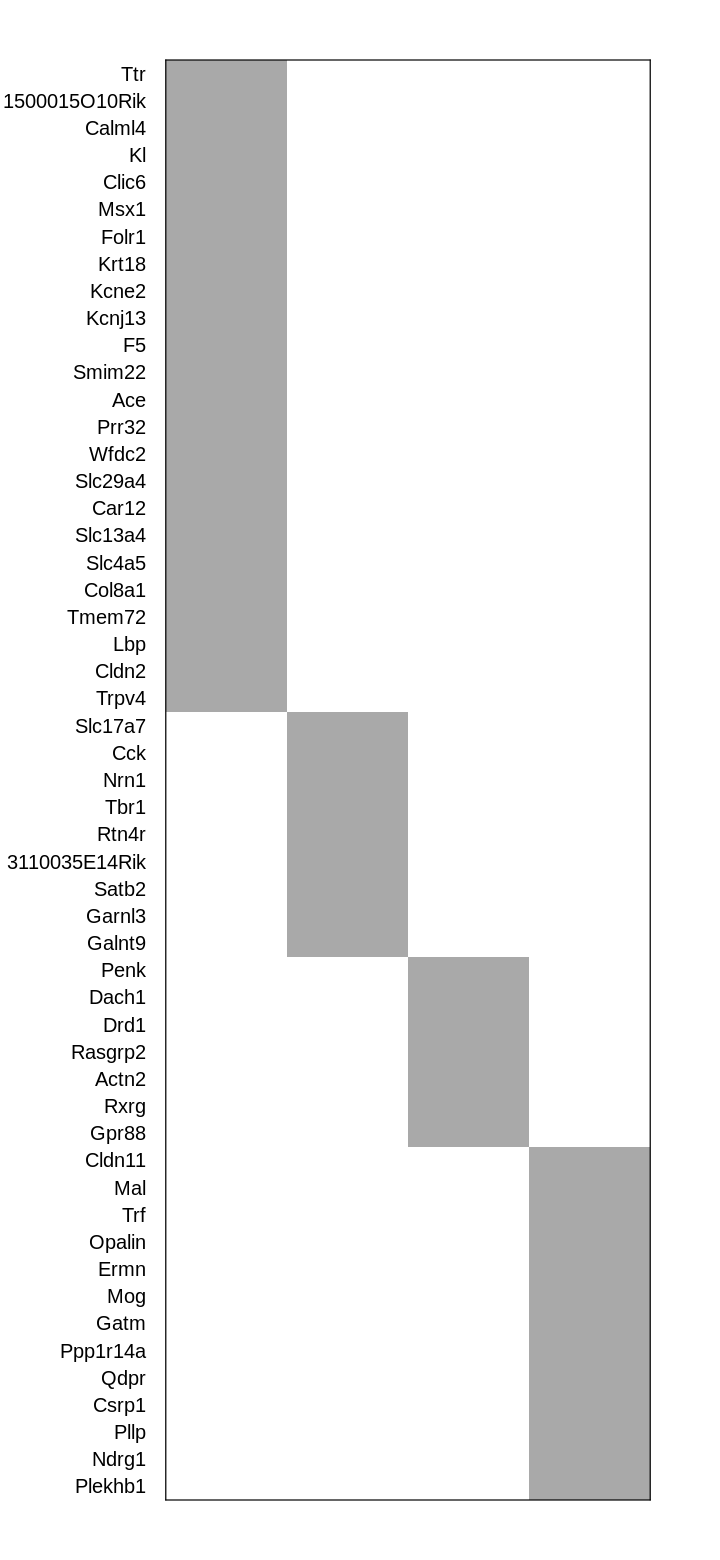

In [65]:
options(repr.plot.width = 6, repr.plot.height = 13)

par(mgp=c(3, 0,0),mar=c(0,6,0,2)+0.1)
plotBM(data.matrix(B), boxCol = "darkgrey", reorder = FALSE, frame = TRUE)

#### Saving matrix B as .csv

In [66]:
#adding dummy type
B <- cbind(B, 0)
types <- c(types, "DT")
colnames(B) <- types
write.csv(B, paste0(input_data, "matB.csv"))

## Loading and extracting data on mouse brain from Seurat package

In this demonstrative example we use publicly available [data on the mouse brain](https://support.10xgenomics.com/spatial-gene-expression/datasets/1.1.0/V1_Mouse_Brain_Sagittal_Anterior), that can be also acessed via [Seurat](https://satijalab.org/seurat/). To simplify the problem, we subset data.

In [67]:
library(Seurat)
library(SeuratData)

In [68]:
brain <- LoadData("stxBrain", type = "anterior1")
ST <- brain@assays$Spatial@data

# subsetting ST data to marker genes
ST <- ST[rownames(ST) %in% rownames(B), ]
ST <- as.matrix(ST)

#### Extracting coordinates

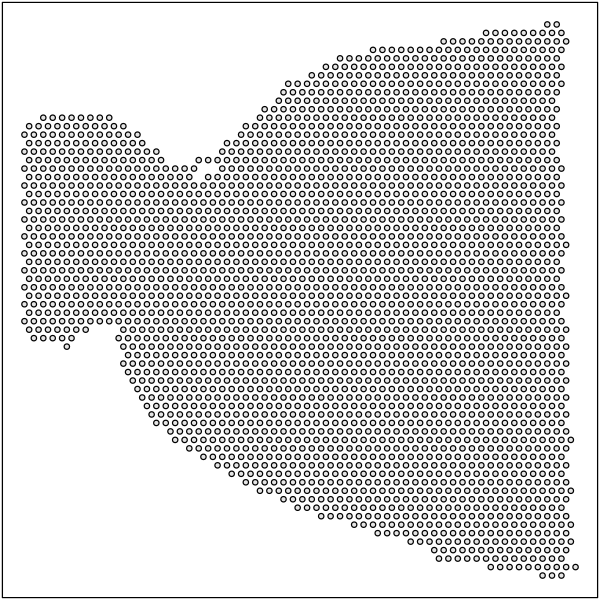

In [69]:
cor <- brain@images$anterior1@coordinates
xx <- cor$col
yy <- cor$row

spots <- paste0("X", xx, "x", yy)
colnames(ST) <- spots
#Visualizing spots taken on the tissue
options(repr.plot.width = 5, repr.plot.height = 5)
par(mgp=c(0, 0,0),mar=c(0,0,0,0)+0.1)
plot(xx,yy, xlab="", ylab="",  pch=21, col="black", bg="gray90", xaxt="n", yaxt="n", ann = FALSE,  cex=0.6) 

#### Choosing an arbitrary subset of spots

In [70]:
df <- data.frame(x=xx, y=yy)
chosen <- df[ (df$x<102) & (df$x > 70), ]
chosen <- chosen[ (chosen$y>20) & (chosen$y < 50)    ,]

#### Visualizing spots taken on the tissue and the chosen subset

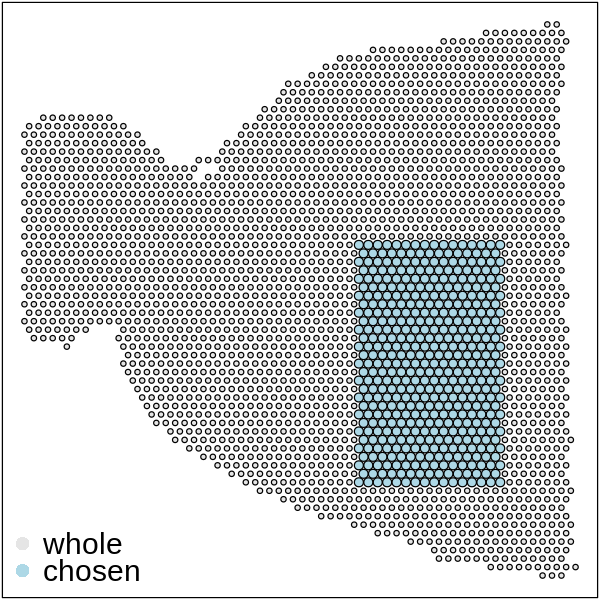

In [71]:
options(repr.plot.width = 5, repr.plot.height = 5)
par(mgp=c(0, 0,0),mar=c(0,0,0,0)+0.1)
plot(xx,yy, xlab="", ylab="",  pch=21, col="black", bg="gray90", xaxt="n", yaxt="n", ann = FALSE,  cex=0.6)
points(chosen$x, chosen$y, pch=21, col="black", bg="lightblue")
legend("bottomleft", legend=c("whole", "chosen"), pch=16, col=c("gray90", "lightblue" ), cex=1.5, bty="n")



<span style="color:red">**IMPORTANT: genes in ST matrix must be in the same order as in B matrix**</span>.

In [74]:
# subsetting ST data to the chosen subset of spots
coord <- paste0("X", chosen$x, "x", chosen$y)
ST <- ST[,colnames(ST) %in% coord]
# genes in ST matrix must be in the same order as in B matrix
ST <- ST[match(rownames(B), rownames(ST) ),]
#Saving ST matrix to `.csv` file
write.csv(as.matrix(ST), paste0(input_data, "C_gs.csv"))
ST[1:5, 1:5]  %>% kable("html") %>% as.character() %>% display_html()

,X79x35,X94x44,X96x42,X94x26,X99x27
Ttr,227,12,52,0,2
1500015O10Rik,2,0,0,0,0
Calml4,0,0,0,0,0
Kl,3,0,0,0,0
Clic6,0,0,0,0,0


## Estimate for the number of all cells

In [75]:
df_number_of_cells <- read.table("~/Celloscope/data/mouse-brain/CellCountSummary_Seurat.txt",  sep=",", header = TRUE, stringsAsFactors = FALSE)
as.matrix(head(df_number_of_cells))%>% kable("html") %>% as.character() %>% display_html()
#as.matrix(head(df_number_of_cells))

image.name,spot.coordinates,no.of.nuclei
Seurat,11x97,5 nuclei
Seurat,11x99,10 nuclei
Seurat,11x101,8 nuclei
Seurat,11x103,7 nuclei
Seurat,11x105,4 nuclei
Seurat,11x107,8 nuclei


Extracting coordinates to check the agreement with coordinates from ST data file

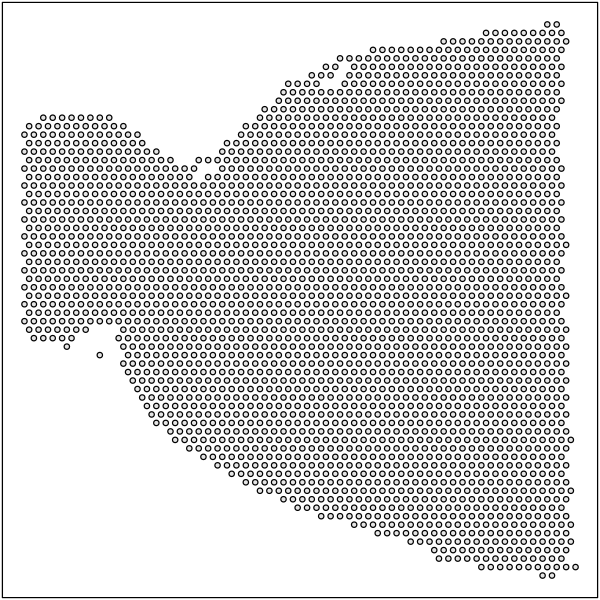

In [76]:
lista <- str_split(df_number_of_cells$spot.coordinates, "x")
xx <- as.numeric(sapply(lista, function(x) x[[1]]))
yy <- as.numeric(sapply(lista, function(x) x[[2]]))
par(mgp=c(0, 0,0),mar=c(0,0,0,0)+0.1)
plot(yy,xx, xlab="", ylab="",  pch=21, col="black", bg="gray90", xaxt="n", yaxt="n", ann = FALSE,  cex=0.6)

In [77]:
# alignment of coordinates with ST data
df_number_of_cells$"spot.coordinates" <- paste0("X", yy, "x", xx)
# extrating numbers of cells from column 'no.of.nuclei'
df_number_of_cells$"no.of.nuclei" <- as.numeric(gsub("([0-9]+).*$", "\\1", df_number_of_cells$"no.of.nuclei"))

# selecting our spots of interest 
n_cells <- df_number_of_cells[df_number_of_cells$"spot.coordinates" %in% coord,]

<span style="color:red">**IMPORTANT spots must be in the same order as in columns of ST matrix**</span>.

In [78]:
n_cells <- df_number_of_cells[match(coord, df_number_of_cells$"spot.coordinates"),]   
n_cells$"no.of.nuclei"[n_cells$"no.of.nuclei"==0] <- 1
rownames(n_cells) <- c()
head(n_cells) %>% kable("html") %>% as.character() %>% display_html()

image.name,spot.coordinates,no.of.nuclei
Seurat,X79x35,13
Seurat,X94x44,12
Seurat,X96x42,13
Seurat,X94x26,11
Seurat,X99x27,16
Seurat,X96x40,15


Saving number of cells to `.csv` file

In [79]:
write.csv(n_cells, paste0(input_data, "n_cells.csv"))